In [113]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
plt.style.use('seaborn')

Calculation of magnatic field of nickel film

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [12:54<00:00,  7.74s/it]


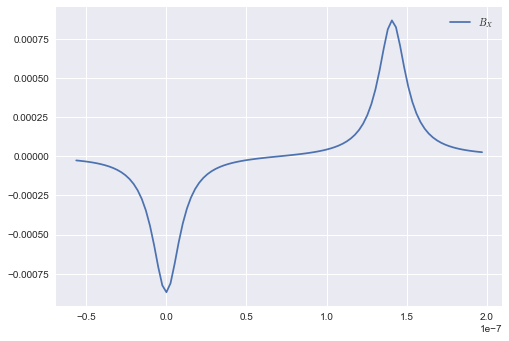

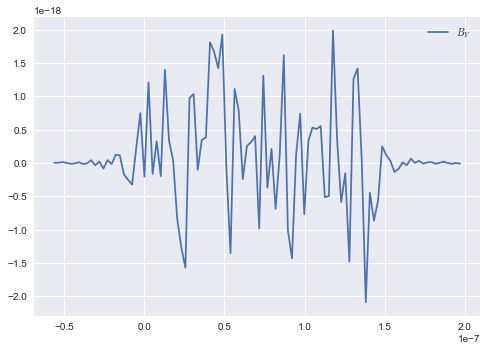

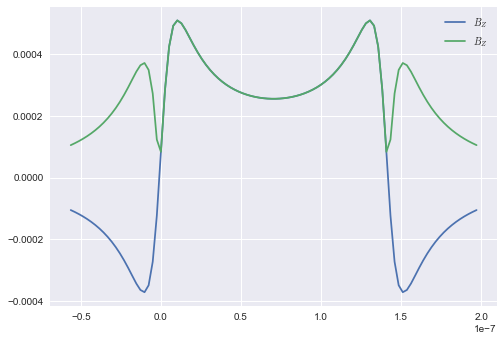

In [116]:
µ0 = 4*np.pi*10**(-7) #vacuum permeability in N/A^2
µB = 9.2740100783e-24 #in J/T

lp = 0.352e-9*1 #lattice parameter of the fcc unit cell in m
m_µB = 0.606 #magnetic moment in µB per nickel atom at 0 K
m = m_µB*µB #magnetic moment in J/T

m = np.array([0,0,1])*m

nx = 400 #number_of_dipoles in x
ny = 2000 #
nz = 1

ax = nx*lp #length of the square of interest in m
ay = ny*lp
az = nz*lp

n_sensorx = 100 #granularity of sensor positions
standoff = 10e-9

#try to calculate the magnetic field from the magnatic moment of several unit cells arragend in a cube beneath the measurement point
dipole_positions = np.zeros((nz,ny,nx,3))
sensor_positionsx = np.zeros((n_sensorx,3))
sensor_positionsy = np.zeros((n_sensory,3))

dip_start=0
dip_stop=ax
dip_posx = np.linspace(dip_start, dip_stop,nx)

dip_start=0
dip_stop=ay
dip_posy = np.linspace(dip_start, dip_stop,ny)

dip_start=0
dip_stop=az
dip_posz = np.linspace(dip_start, dip_stop,nz)

for i in range(nz):
    for j in range(ny):
        for k in range(nx):
            dipole_positions[i,j,k] = np.array([dip_posx[k],dip_posy[j],dip_posz[i]])

sens_start=-ax*0.4
sens_stop=ax*1.4
sens_pos = np.linspace(sens_start, sens_stop,n_sensor)

for i in range(n_sensor):
    sensor_positions[i] = np.array([sens_pos[i],ay/2,standoff+az])

# sens_starty=-ay*0.4
# sens_stopy=ay*1.4
# sens_posy = np.linspace(sens_starty, sens_stopy,n_sensory)

# for i in range(n_sensory):
#     sensor_positions[i] = np.array([ax/2,sens_posy[i],standoff+az])
    


b_sensor = np.zeros_like(sensor_positions)

for sn, s_pos in enumerate(tqdm(sensor_positions)):
    for dnz, d_posz in enumerate(dipole_positions):
        for dny, d_posy in enumerate(d_posz):
            for dnx, d_pos in enumerate(d_posy):
                r = s_pos - d_pos
                B = µ0/(4*np.pi)*((3*r*np.dot(m,r))/np.linalg.norm(r)**5-m/np.linalg.norm(r)**3)
                b_sensor[sn] += B
        

plt.plot(sens_pos, b_sensor[:,0], label = "$B_X$")
plt.legend()
plt.show()
plt.plot(sens_pos, b_sensor[:,1], label = "$B_Y$")
plt.legend()
plt.show()
plt.plot(sens_pos, b_sensor[:,2], label = "$B_Z$")
plt.plot(sens_pos, abs(b_sensor[:,2]), label = "$B_Z$")
plt.legend()
plt.show()

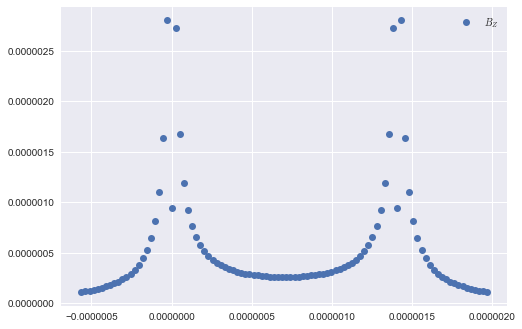

In [114]:
# plt.plot(sens_pos, b_sensor[:,2], 'o', label = "$B_Z$")
plt.plot(sens_pos, abs(b_sensor[:,2]), 'o', label = "$B_Z$")
plt.legend()
plt.show()